### 0.准备工作

In [313]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from sklearn.ensemble import RandomForestRegressor

In [314]:
font_path = 'C:\Windows\Fonts\simhei.ttf'  # 指定你的字体文件路径
font_prop = font_manager.FontProperties(fname=font_path, size=12)

In [315]:
# 文件夹路径
folder_path = 'data'
# Excel文件名
table1_file='表1-患者列表及临床信息.xlsx'
table2_file = '表2-患者影像信息血肿及水肿的体积及位置.xlsx'
attach1_file='附表1-检索表格-流水号vs时间(1).xlsx'
# 构建完整文件路径
table1_path=os.path.join(folder_path, table1_file)
table2_path = os.path.join(folder_path, table2_file)
attach1_path=os.path.join(folder_path, attach1_file)
# 读取Excel文件
table1=pd.read_excel(table1_path)
table2 = pd.read_excel(table2_path)
attach1=pd.read_excel(attach1_path)

In [316]:
print(table1)
print(table1.dtypes)

    Unnamed: 0  90天mRS 数据集划分     入院首次影像检查流水号  年龄 性别  脑出血前mRS评分  高血压病史  卒中病史  \
0       sub001     4.0    训练  20161212002136  43  女          0      0     0   
1       sub002     0.0    训练  20160406002131  58  男          0      1     0   
2       sub003     5.0    训练  20160413000006  78  男          0      1     0   
3       sub004     4.0    训练  20161215001667  70  男          2      1     1   
4       sub005     3.0    训练  20161222000978  51  男          0      0     0   
..         ...     ...   ...             ...  .. ..        ...    ...   ...   
155     sub156     NaN   测试2  20200306000927  87  女          0      1     0   
156     sub157     NaN   测试2  20201009003102  52  男          2      1     1   
157     sub158     NaN   测试2  20200410001952  57  男          0      1     0   
158     sub159     NaN   测试2  20200218000582  47  男          0      1     0   
159     sub160     NaN   测试2  20200821002584  80  女          0      1     0   

     糖尿病史  ...  饮酒史  发病到首次影像检查时间间隔       血压  脑室引流  

In [317]:
print(table2)

         ID         首次检查流水号  HM_volume  HM_ACA_R_Ratio  HM_MCA_R_Ratio  \
0    sub001  20161212002136      69714        0.000258        0.877112   
1    sub002  20160406002131      47500        0.496000        0.180779   
2    sub003  20160413000006      86396        0.053718        0.829078   
3    sub004  20161215001667      45498        0.002242        0.002198   
4    sub005  20161222000978      14832        0.000000        0.000000   
..      ...             ...        ...             ...             ...   
155  sub156  20200306000927      32559        0.000000        0.033754   
156  sub157  20201009003102      18150        0.000000        0.000000   
157  sub158  20200410001952      27969        0.002682        0.937359   
158  sub159  20200218000582      53154        0.000000        0.000000   
159  sub160  20200821002584      49019        0.000000        0.907505   

     HM_PCA_R_Ratio  HM_Pons_Medulla_R_Ratio  HM_Cerebellum_R_Ratio  \
0          0.120148                 0.00

In [318]:
print(attach1)

    Unnamed: 0  重复次数           入院首次检查时间点       入院首次检查流水号              随访1时间点  \
0       sub001     5 2016-12-12 23:32:54  20161212002136 2016-12-13 05:19:00   
1       sub002     5 2016-04-06 21:21:03  20160406002131 2016-04-07 09:16:27   
2       sub003     3 2016-04-13 01:18:17  20160413000006 2016-04-13 08:49:38   
3       sub004     4 2016-12-15 22:53:41  20161215001667 2016-12-16 14:52:08   
4       sub005     3 2016-12-22 13:18:48  20161222000978 2016-12-23 10:46:51   
..         ...   ...                 ...             ...                 ...   
155     sub156     4 2020-03-06 14:33:56  20200306000927 2020-03-07 09:56:51   
156     sub157     4 2020-10-09 19:35:00  20201009003102 2020-10-09 20:27:00   
157     sub158     4 2020-04-10 17:40:00  20200410001952 2020-04-11 09:15:00   
158     sub159     2 2020-02-18 15:29:00  20200218000582 2020-02-19 15:01:00   
159     sub160     2 2020-08-21 22:32:00  20200821002584 2020-08-22 12:01:00   

             随访1流水号              随访2时间点

### 1.数据分析

In [319]:
table1_a_1=table1.loc[0:99,'发病到首次影像检查时间间隔']
print(table1_a_1)

0     2.5
1     3.0
2     2.0
3     1.0
4     5.0
     ... 
95    1.0
96    3.0
97    2.5
98    3.0
99    0.5
Name: 发病到首次影像检查时间间隔, Length: 100, dtype: float64


In [320]:
table2_a_1 = table2.iloc[0:100, [0,1,13,24,36,47,59,70,82,93,105,116,128,139,151,162,174,185,197]]
print(table2_a_1)

        ID         首次检查流水号  ED_volume        随访1流水号  ED_volume.1  \
0   sub001  20161212002136      48919  2.016121e+13      57898.0   
1   sub002  20160406002131      23526  2.016041e+13      23390.0   
2   sub003  20160413000006      32621  2.016041e+13      41292.0   
3   sub004  20161215001667      22191  2.016122e+13      18956.0   
4   sub005  20161222000978      47392  2.016122e+13      23182.0   
..     ...             ...        ...           ...          ...   
95  sub096  20180802001789       5951  2.018080e+13       6094.0   
96  sub097  20181010000767      10227  2.018101e+13       8635.0   
97  sub098  20180612002507      39868  2.018061e+13      29007.0   
98  sub099  20180620002296       9653  2.018062e+13      19517.0   
99  sub100  20180314000010       7367  2.018032e+13       6033.0   

          随访2流水号  ED_volume.2        随访3流水号  ED_volume.3        随访4流水号  \
0   2.016122e+13      81747.0  2.016122e+13     107793.0  2.016123e+13   
1   2.016041e+13      28415.0  2.01

In [321]:
attach1_a_1=attach1.iloc[0:100,0:20]
attach1_a_1=attach1_a_1.drop('重复次数',axis=1)
print(attach1_a_1)

   Unnamed: 0           入院首次检查时间点       入院首次检查流水号              随访1时间点  \
0      sub001 2016-12-12 23:32:54  20161212002136 2016-12-13 05:19:00   
1      sub002 2016-04-06 21:21:03  20160406002131 2016-04-07 09:16:27   
2      sub003 2016-04-13 01:18:17  20160413000006 2016-04-13 08:49:38   
3      sub004 2016-12-15 22:53:41  20161215001667 2016-12-16 14:52:08   
4      sub005 2016-12-22 13:18:48  20161222000978 2016-12-23 10:46:51   
..        ...                 ...             ...                 ...   
95     sub096 2018-08-02 19:28:50  20180802001789 2018-08-03 08:14:31   
96     sub097 2018-10-10 09:21:10  20181010000767 2018-10-11 14:16:42   
97     sub098 2018-06-12 22:32:20  20180612002507 2018-06-14 14:47:44   
98     sub099 2018-06-20 19:03:09  20180620002296 2018-06-21 09:43:31   
99     sub100 2018-03-14 04:46:39  20180314000010 2018-03-15 15:00:31   

            随访1流水号              随访2时间点        随访2流水号              随访3时间点  \
0   20161213000009 2016-12-18 09:09:24  2.01612

In [322]:
table2_a_1

,ID,首次检查流水号,ED_volume,随访1流水号,ED_volume.1,随访2流水号,ED_volume.2,随访3流水号,ED_volume.3,随访4流水号,ED_volume.4,随访5流水号,ED_volume.5,随访6流水号,ED_volume.6,随访7流水号,ED_volume.7,随访8流水号,ED_volume.8
0,sub001,20161212002136,48919,2.016121e+13,57898.0,2.016122e+13,81747.0,2.016122e+13,107793.0,2.016123e+13,126558.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sub002,20160406002131,23526,2.016041e+13,23390.0,2.016041e+13,28415.0,2.016043e+13,34868.0,2.016052e+13,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,sub003,20160413000006,32621,2.016041e+13,41292.0,2.016041e+13,49767.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,sub004,20161215001667,22191,2.016122e+13,18956.0,2.016122e+13,9540.0,2.016123e+13,5204.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,sub005,20161222000978,47392,2.016122e+13,23182.0,2.016123e+13,12898.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,sub096,20180802001789,5951,2.018080e+13,6094.0,2.018081e+13,9911.0,2.018081e+13,11687.0,2.018082e+13,231.0,2.018083e+13,0.0,NaN,NaN,NaN,NaN,NaN,NaN
96,sub097,20181010000767,10227,2.018101e+13,8635.0,2.018102e+13,1316.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,sub098,20180612002507,39868,2.018061e+13,29007.0,2.018062e+13,26426.0,2.018071e+13,40666.0,2.018072e+13,17288.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,sub099,20180620002296,9653,2.018062e+13,19517.0,2.018062e+13,30933.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [323]:
attach1_a_1

,Unnamed: 0,入院首次检查时间点,入院首次检查流水号,随访1时间点,随访1流水号,随访2时间点,随访2流水号,随访3时间点,随访3流水号,随访4时间点,随访4流水号,随访5时间点,随访5流水号,随访6时间点,随访6流水号,随访7时间点,随访7流水号,随访8时间点,随访8流水号
0,sub001,2016-12-12 23:32:54,20161212002136,2016-12-13 05:19:00,20161213000009,2016-12-18 09:09:24,2.016122e+13,2016-12-23 16:47:09,2.016122e+13,2016-12-30 14:35:12,2.016123e+13,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN
1,sub002,2016-04-06 21:21:03,20160406002131,2016-04-07 09:16:27,20160407000424,2016-04-09 15:34:22,2.016041e+13,2016-04-25 10:22:02,2.016043e+13,2016-05-23 09:32:34,2.016052e+13,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN
2,sub003,2016-04-13 01:18:17,20160413000006,2016-04-13 08:49:38,20160413000428,2016-04-14 14:54:02,2.016041e+13,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN
3,sub004,2016-12-15 22:53:41,20161215001667,2016-12-16 14:52:08,20161216001119,2016-12-19 09:44:24,2.016122e+13,2016-12-25 09:23:45,2.016123e+13,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN
4,sub005,2016-12-22 13:18:48,20161222000978,2016-12-23 10:46:51,20161223000561,2016-12-26 10:15:23,2.016123e+13,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,sub096,2018-08-02 19:28:50,20180802001789,2018-08-03 08:14:31,20180803000170,2018-08-06 10:27:39,2.018081e+13,2018-08-13 09:35:59,2.018081e+13,2018-08-20 09:58:54,2.018082e+13,2018-08-27 14:07:24,2.018083e+13,NaT,NaN,NaT,NaN,NaT,NaN
96,sub097,2018-10-10 09:21:10,20181010000767,2018-10-11 14:16:42,20181011001620,2018-10-17 09:45:11,2.018102e+13,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN
97,sub098,2018-06-12 22:32:20,20180612002507,2018-06-14 14:47:44,20180614001471,2018-06-20 15:41:45,2.018062e+13,2018-07-06 14:32:09,2.018071e+13,2018-07-20 11:24:26,2.018072e+13,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN
98,sub099,2018-06-20 19:03:09,20180620002296,2018-06-21 09:43:31,20180621000781,2018-06-22 10:34:55,2.018062e+13,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN


In [324]:
print(table2_a_1.dtypes)
print('-'*50)
print(attach1_a_1.dtypes)

ID              object
首次检查流水号          int64
ED_volume        int64
随访1流水号         float64
ED_volume.1    float64
随访2流水号         float64
ED_volume.2    float64
随访3流水号         float64
ED_volume.3    float64
随访4流水号         float64
ED_volume.4    float64
随访5流水号         float64
ED_volume.5    float64
随访6流水号         float64
ED_volume.6    float64
随访7流水号         float64
ED_volume.7    float64
随访8流水号         float64
ED_volume.8    float64
dtype: object
--------------------------------------------------
Unnamed: 0            object
入院首次检查时间点     datetime64[ns]
入院首次检查流水号              int64
随访1时间点        datetime64[ns]
随访1流水号                 int64
随访2时间点        datetime64[ns]
随访2流水号               float64
随访3时间点        datetime64[ns]
随访3流水号               float64
随访4时间点        datetime64[ns]
随访4流水号               float64
随访5时间点        datetime64[ns]
随访5流水号               float64
随访6时间点        datetime64[ns]
随访6流水号               float64
随访7时间点        datetime64[ns]
随访7流水号               float64
随访8时间

In [325]:
#table2_a_1处理ED_volume数据
i=4
while i<=18:
    table2_a_1.iloc[:,i]=(table2_a_1.iloc[:,i]-table2_a_1.iloc[:,2])
    i+=2
table2_a_1.iloc[:,2]=(table2_a_1.iloc[:,2]-table2_a_1.iloc[:,2])
table2_a_1

,ID,首次检查流水号,ED_volume,随访1流水号,ED_volume.1,随访2流水号,ED_volume.2,随访3流水号,ED_volume.3,随访4流水号,ED_volume.4,随访5流水号,ED_volume.5,随访6流水号,ED_volume.6,随访7流水号,ED_volume.7,随访8流水号,ED_volume.8
0,sub001,20161212002136,0,2.016121e+13,8979.0,2.016122e+13,32828.0,2.016122e+13,58874.0,2.016123e+13,77639.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sub002,20160406002131,0,2.016041e+13,-136.0,2.016041e+13,4889.0,2.016043e+13,11342.0,2.016052e+13,-23526.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,sub003,20160413000006,0,2.016041e+13,8671.0,2.016041e+13,17146.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,sub004,20161215001667,0,2.016122e+13,-3235.0,2.016122e+13,-12651.0,2.016123e+13,-16987.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,sub005,20161222000978,0,2.016122e+13,-24210.0,2.016123e+13,-34494.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,sub096,20180802001789,0,2.018080e+13,143.0,2.018081e+13,3960.0,2.018081e+13,5736.0,2.018082e+13,-5720.0,2.018083e+13,-5951.0,NaN,NaN,NaN,NaN,NaN,NaN
96,sub097,20181010000767,0,2.018101e+13,-1592.0,2.018102e+13,-8911.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,sub098,20180612002507,0,2.018061e+13,-10861.0,2.018062e+13,-13442.0,2.018071e+13,798.0,2.018072e+13,-22580.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,sub099,20180620002296,0,2.018062e+13,9864.0,2.018062e+13,21280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [326]:
#把attach1_a_1中的时间点替代table2_a_1的流水号
i=1
while i<=18:
    table2_a_1.iloc[:,i]=attach1_a_1.iloc[:,i]
    i+=2
table2_a_1

,ID,首次检查流水号,ED_volume,随访1流水号,ED_volume.1,随访2流水号,ED_volume.2,随访3流水号,ED_volume.3,随访4流水号,ED_volume.4,随访5流水号,ED_volume.5,随访6流水号,ED_volume.6,随访7流水号,ED_volume.7,随访8流水号,ED_volume.8
0,sub001,2016-12-12 23:32:54,0,2016-12-13 05:19:00,8979.0,2016-12-18 09:09:24,32828.0,2016-12-23 16:47:09,58874.0,2016-12-30 14:35:12,77639.0,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN
1,sub002,2016-04-06 21:21:03,0,2016-04-07 09:16:27,-136.0,2016-04-09 15:34:22,4889.0,2016-04-25 10:22:02,11342.0,2016-05-23 09:32:34,-23526.0,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN
2,sub003,2016-04-13 01:18:17,0,2016-04-13 08:49:38,8671.0,2016-04-14 14:54:02,17146.0,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN
3,sub004,2016-12-15 22:53:41,0,2016-12-16 14:52:08,-3235.0,2016-12-19 09:44:24,-12651.0,2016-12-25 09:23:45,-16987.0,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN
4,sub005,2016-12-22 13:18:48,0,2016-12-23 10:46:51,-24210.0,2016-12-26 10:15:23,-34494.0,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,sub096,2018-08-02 19:28:50,0,2018-08-03 08:14:31,143.0,2018-08-06 10:27:39,3960.0,2018-08-13 09:35:59,5736.0,2018-08-20 09:58:54,-5720.0,2018-08-27 14:07:24,-5951.0,NaT,NaN,NaT,NaN,NaT,NaN
96,sub097,2018-10-10 09:21:10,0,2018-10-11 14:16:42,-1592.0,2018-10-17 09:45:11,-8911.0,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN
97,sub098,2018-06-12 22:32:20,0,2018-06-14 14:47:44,-10861.0,2018-06-20 15:41:45,-13442.0,2018-07-06 14:32:09,798.0,2018-07-20 11:24:26,-22580.0,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN
98,sub099,2018-06-20 19:03:09,0,2018-06-21 09:43:31,9864.0,2018-06-22 10:34:55,21280.0,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN


In [327]:
#把table2_a_1'流水号’的列名改为attach1_a_1‘时间点’的列名
column_to_replace={}
i=1
while i<=18:
    column_to_replace.update({table2_a_1.columns[i]:attach1_a_1.columns[i]})
    i+=2
table2_a_1=table2_a_1.rename(columns=column_to_replace)
table2_a_1

,ID,入院首次检查时间点,ED_volume,随访1时间点,ED_volume.1,随访2时间点,ED_volume.2,随访3时间点,ED_volume.3,随访4时间点,ED_volume.4,随访5时间点,ED_volume.5,随访6时间点,ED_volume.6,随访7时间点,ED_volume.7,随访8时间点,ED_volume.8
0,sub001,2016-12-12 23:32:54,0,2016-12-13 05:19:00,8979.0,2016-12-18 09:09:24,32828.0,2016-12-23 16:47:09,58874.0,2016-12-30 14:35:12,77639.0,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN
1,sub002,2016-04-06 21:21:03,0,2016-04-07 09:16:27,-136.0,2016-04-09 15:34:22,4889.0,2016-04-25 10:22:02,11342.0,2016-05-23 09:32:34,-23526.0,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN
2,sub003,2016-04-13 01:18:17,0,2016-04-13 08:49:38,8671.0,2016-04-14 14:54:02,17146.0,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN
3,sub004,2016-12-15 22:53:41,0,2016-12-16 14:52:08,-3235.0,2016-12-19 09:44:24,-12651.0,2016-12-25 09:23:45,-16987.0,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN
4,sub005,2016-12-22 13:18:48,0,2016-12-23 10:46:51,-24210.0,2016-12-26 10:15:23,-34494.0,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,sub096,2018-08-02 19:28:50,0,2018-08-03 08:14:31,143.0,2018-08-06 10:27:39,3960.0,2018-08-13 09:35:59,5736.0,2018-08-20 09:58:54,-5720.0,2018-08-27 14:07:24,-5951.0,NaT,NaN,NaT,NaN,NaT,NaN
96,sub097,2018-10-10 09:21:10,0,2018-10-11 14:16:42,-1592.0,2018-10-17 09:45:11,-8911.0,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN
97,sub098,2018-06-12 22:32:20,0,2018-06-14 14:47:44,-10861.0,2018-06-20 15:41:45,-13442.0,2018-07-06 14:32:09,798.0,2018-07-20 11:24:26,-22580.0,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN
98,sub099,2018-06-20 19:03:09,0,2018-06-21 09:43:31,9864.0,2018-06-22 10:34:55,21280.0,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN


In [328]:
print(table2_a_1.dtypes)

ID                     object
入院首次检查时间点      datetime64[ns]
ED_volume               int64
随访1时间点         datetime64[ns]
ED_volume.1           float64
随访2时间点         datetime64[ns]
ED_volume.2           float64
随访3时间点         datetime64[ns]
ED_volume.3           float64
随访4时间点         datetime64[ns]
ED_volume.4           float64
随访5时间点         datetime64[ns]
ED_volume.5           float64
随访6时间点         datetime64[ns]
ED_volume.6           float64
随访7时间点         datetime64[ns]
ED_volume.7           float64
随访8时间点         datetime64[ns]
ED_volume.8           float64
dtype: object


In [329]:
#table2_a_1处理时间点数据，改成days
i=3
while i<=18:
    table2_a_1.iloc[:,i]=table2_a_1.iloc[:,i]-table2_a_1.iloc[:,1]
    table2_a_1.iloc[:,i]=table2_a_1.iloc[:,i].dt.days
    i+=2
table2_a_1.iloc[:,1]=table2_a_1.iloc[:,1]-table2_a_1.iloc[:,1]
table2_a_1.iloc[:,1]=table2_a_1.iloc[:,1].dt.days
table2_a_1

,ID,入院首次检查时间点,ED_volume,随访1时间点,ED_volume.1,随访2时间点,ED_volume.2,随访3时间点,ED_volume.3,随访4时间点,ED_volume.4,随访5时间点,ED_volume.5,随访6时间点,ED_volume.6,随访7时间点,ED_volume.7,随访8时间点,ED_volume.8
0,sub001,0,0,0,8979.0,5,32828.0,10.0,58874.0,17.0,77639.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sub002,0,0,0,-136.0,2,4889.0,18.0,11342.0,46.0,-23526.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,sub003,0,0,0,8671.0,1,17146.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,sub004,0,0,0,-3235.0,3,-12651.0,9.0,-16987.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,sub005,0,0,0,-24210.0,3,-34494.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,sub096,0,0,0,143.0,3,3960.0,10.0,5736.0,17.0,-5720.0,24.0,-5951.0,NaN,NaN,NaN,NaN,NaN,NaN
96,sub097,0,0,1,-1592.0,7,-8911.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,sub098,0,0,1,-10861.0,7,-13442.0,23.0,798.0,37.0,-22580.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,sub099,0,0,0,9864.0,1,21280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [330]:
table2_a_1.dtypes

ID              object
入院首次检查时间点        int64
ED_volume        int64
随访1时间点           int64
ED_volume.1    float64
随访2时间点           int64
ED_volume.2    float64
随访3时间点         float64
ED_volume.3    float64
随访4时间点         float64
ED_volume.4    float64
随访5时间点         float64
ED_volume.5    float64
随访6时间点         float64
ED_volume.6    float64
随访7时间点         float64
ED_volume.7    float64
随访8时间点         float64
ED_volume.8    float64
dtype: object

In [331]:
# 建立table2_a_1副本
table2_a_1_copy = table2_a_1.copy()
table2_a_1_copy

,ID,入院首次检查时间点,ED_volume,随访1时间点,ED_volume.1,随访2时间点,ED_volume.2,随访3时间点,ED_volume.3,随访4时间点,ED_volume.4,随访5时间点,ED_volume.5,随访6时间点,ED_volume.6,随访7时间点,ED_volume.7,随访8时间点,ED_volume.8
0,sub001,0,0,0,8979.0,5,32828.0,10.0,58874.0,17.0,77639.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sub002,0,0,0,-136.0,2,4889.0,18.0,11342.0,46.0,-23526.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,sub003,0,0,0,8671.0,1,17146.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,sub004,0,0,0,-3235.0,3,-12651.0,9.0,-16987.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,sub005,0,0,0,-24210.0,3,-34494.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,sub096,0,0,0,143.0,3,3960.0,10.0,5736.0,17.0,-5720.0,24.0,-5951.0,NaN,NaN,NaN,NaN,NaN,NaN
96,sub097,0,0,1,-1592.0,7,-8911.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,sub098,0,0,1,-10861.0,7,-13442.0,23.0,798.0,37.0,-22580.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,sub099,0,0,0,9864.0,1,21280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [332]:
#table2_a_1去掉'ID'列
table2_a_1=table2_a_1.drop('ID',axis=1)
table2_a_1

,入院首次检查时间点,ED_volume,随访1时间点,ED_volume.1,随访2时间点,ED_volume.2,随访3时间点,ED_volume.3,随访4时间点,ED_volume.4,随访5时间点,ED_volume.5,随访6时间点,ED_volume.6,随访7时间点,ED_volume.7,随访8时间点,ED_volume.8
0,0,0,0,8979.0,5,32828.0,10.0,58874.0,17.0,77639.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0,0,-136.0,2,4889.0,18.0,11342.0,46.0,-23526.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,0,8671.0,1,17146.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,0,-3235.0,3,-12651.0,9.0,-16987.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0,0,-24210.0,3,-34494.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,143.0,3,3960.0,10.0,5736.0,17.0,-5720.0,24.0,-5951.0,NaN,NaN,NaN,NaN,NaN,NaN
96,0,0,1,-1592.0,7,-8911.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,0,0,1,-10861.0,7,-13442.0,23.0,798.0,37.0,-22580.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,0,0,0,9864.0,1,21280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [333]:
#把table2_a_1竖向切割后堆叠
tables=[]
i=1
while i<=18:
    df=table2_a_1.iloc[:,i-1:i+1]
    df=df.rename(columns={df.columns[0]:'时间点',df.columns[1]:'ED_volume'})
    tables.append(df)
    i+=2
stacked_df=pd.concat(tables,axis=0,ignore_index=True)

In [334]:
#去掉空数据和重复数据，排序，去掉异常数据值
stacked_df= stacked_df.dropna()
stacked_df= stacked_df.drop_duplicates()
stacked_df = stacked_df.sort_values(by='时间点', ascending=True)
# stacked_df=stacked_df[stacked_df['ED_volume']<=8]
# stacked_df=stacked_df[stacked_df['ED_volume']>=-1]
stacked_df

,时间点,ED_volume
0,0.0,0.0
162,0.0,1509.0
161,0.0,2846.0
160,0.0,5918.0
159,0.0,11295.0
...,...,...
543,155.0,-26083.0
480,179.0,71156.0
493,180.0,-7667.0
551,188.0,-7036.0


In [335]:
# groupby，.mean()
grouped=stacked_df.groupby('时间点')
ED_volume=grouped['ED_volume'].mean()
print(ED_volume)
Timepoint=list(grouped.groups.keys())
print(Timepoint)

时间点
0.0       6871.608696
1.0       8948.354167
2.0      15573.000000
3.0      17569.714286
4.0       9934.687500
5.0      33247.166667
6.0       9145.444444
7.0      17196.157895
8.0       9466.000000
9.0       7734.363636
10.0      9430.000000
11.0     32231.400000
12.0     21821.900000
13.0      6261.000000
14.0     27483.800000
15.0     18579.800000
16.0     23595.800000
17.0     25207.500000
18.0      9819.200000
19.0     35974.142857
20.0      2935.000000
21.0      4309.500000
22.0     16379.000000
23.0     36804.333333
24.0     -8432.000000
25.0     28637.333333
26.0     49553.000000
27.0      3883.000000
28.0     38462.000000
30.0      -160.000000
31.0     -7940.000000
32.0     -9374.000000
33.0     -9558.000000
34.0     -1500.000000
37.0    -22580.000000
38.0    -16887.000000
39.0     20544.750000
40.0     15883.000000
43.0     -9961.000000
44.0    -38512.000000
46.0    -23526.000000
48.0     -7264.000000
51.0    -16801.000000
52.0    -14155.000000
55.0    -15091.000000
58.0  

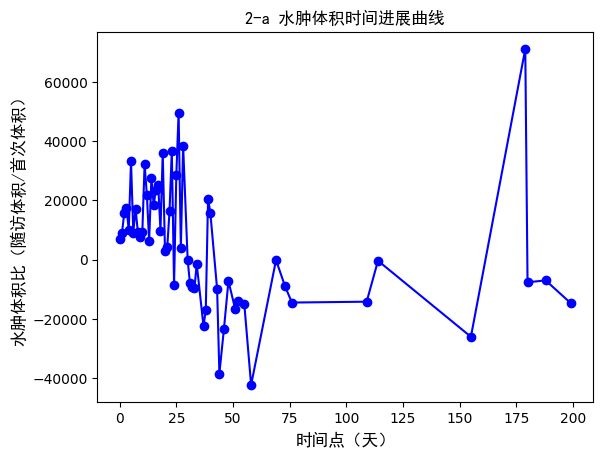

In [336]:
#画散点图
x=Timepoint
y=ED_volume
plt.plot(x,y,marker='o', color='b')
# 添加标题和标签
plt.title('2-a 水肿体积时间进展曲线', fontproperties=font_prop)
plt.xlabel('时间点（天）', fontproperties=font_prop)
plt.ylabel('水肿体积比（随访体积/首次体积）', fontproperties=font_prop)
# 显示折线图
plt.savefig("真实数据.jpg")
plt.show()

### 2.机器学习

In [337]:
# 训练集
print(type(Timepoint))
print(type(ED_volume))

<class 'list'>
<class 'pandas.core.series.Series'>


<class 'numpy.ndarray'>


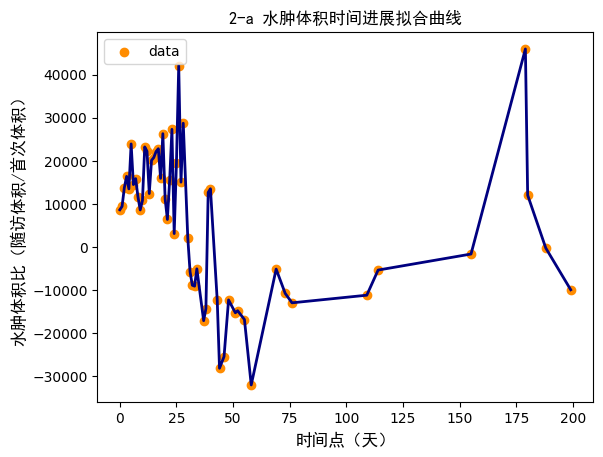

In [338]:
# 随机森林回归
x=np.array(Timepoint).reshape(-1, 1)
y=ED_volume

# 创建随机森林回归模型
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# 训练模型
rf_regressor.fit(x, y)

# 预测
y_pred = rf_regressor.predict(x)
print(type(y_pred))
# 可视化
plt.scatter(x, y_pred, color='darkorange', label='data')
plt.plot(x, y_pred, color='navy', lw=2)
plt.xlabel('时间点（天）',fontproperties=font_prop)
plt.ylabel('水肿体积比（随访体积/首次体积）',fontproperties=font_prop)
plt.title('2-a 水肿体积时间进展拟合曲线',fontproperties=font_prop)
plt.legend()
plt.show()

### 3.计算残差

In [339]:
# 按列处理
# i=1
# while i<=table2_a_1_copy.shape[1]:
#     data=table2_a_1_copy.iloc[:,i].to_numpy()
#     y_pred=rf_regressor.predict(data.reshape(-1,1))
#     column_name=table2_a_1_copy.columns[i+1]+'.pred'
#     table2_a_1_copy.insert(loc=i+1,column=column_name,value=y_pred)
#     i+=2
# table2_a_1_copy

In [340]:
# 输出table2_2_a_copy
output_file_path='D:\Python8\Mathmatics Modeling Competition E\data\ table2_2_a_copy.xlsx'
table2_a_1_copy.to_excel(output_file_path,index=False)

In [341]:
# 按行处理
i=0
res_avg_list=[] # 存储各个患者的残差平均值
while i<=99:
    j=1
    list_time=[] # 时间点数据的list，用于预测数据输入
    list_ED_volume=[] # 真实数据的list
    while j<=18:
        if np.isnan(table2_a_1_copy.iloc[i,j]):
            break
        else:
            list_time.append(table2_a_1_copy.iloc[i,j]) # 加入到时间点数据list
            list_ED_volume.append(table2_a_1_copy.iloc[i,j+1]) # 加入到真实数据的list
        j+=2
    y_pred=rf_regressor.predict(np.array(list_time).reshape(-1,1)) # 用模型得到预测值，此时为ndarray类型
    list_pred=y_pred.tolist() # 预测数据的list
    # 取得两个预测值list与真实值list的数据差的绝对值
    res_list = [abs(a - b) for a, b in zip(list_pred, list_ED_volume)] # 得到残差绝对值list
    res_avg=sum(res_list)/len(res_list) # 求平均残差
    res_avg_list.append(res_avg)
    i+=1
table2_a_1_copy['平均残差']=res_avg_list # 把数据写如“平均残差”列
table2_a_1_copy

,ID,入院首次检查时间点,ED_volume,随访1时间点,ED_volume.1,随访2时间点,ED_volume.2,随访3时间点,ED_volume.3,随访4时间点,ED_volume.4,随访5时间点,ED_volume.5,随访6时间点,ED_volume.6,随访7时间点,ED_volume.7,随访8时间点,ED_volume.8,平均残差
0,sub001,0,0,0,8979.0,5,32828.0,10.0,58874.0,17.0,77639.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24156.569348
1,sub002,0,0,0,-136.0,2,4889.0,18.0,11342.0,46.0,-23526.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6549.373360
2,sub003,0,0,0,8671.0,1,17146.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5461.690768
3,sub004,0,0,0,-3235.0,3,-12651.0,9.0,-16987.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18789.914862
4,sub005,0,0,0,-24210.0,3,-34494.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30795.881873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,sub096,0,0,0,143.0,3,3960.0,10.0,5736.0,17.0,-5720.0,24.0,-5951.0,NaN,NaN,NaN,NaN,NaN,NaN,12044.750327
96,sub097,0,0,1,-1592.0,7,-8911.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14813.979975
97,sub098,0,0,1,-10861.0,7,-13442.0,23.0,798.0,37.0,-22580.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18051.625485
98,sub099,0,0,0,9864.0,1,21280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7237.357435


In [342]:
# 输出table2_a_1_copy
output_file_path='D:\Python8\Mathmatics Modeling Competition E\data\ table2_a_1_copy.xlsx'
table2_a_1_copy.to_excel(output_file_path,index=False)